# MAC and Model Correction or Updating of the FE models using Test Data
#### By Sainag Immidisetty






##### Purpose of bridging the gap between Testing and FE-Simulation:

Product development process have been modifying every now and then, at present most of the companies don't use simulation unless they first establish trust. So, first preference is given to validation at the test condition to use the right modeling techniques in simulation so that the variations can be looked at and the model could be used for development a head of time to see certain phenomenon that would replicate real world. 

## The Wing Structure:

Length, Width, Thickness and Airfoil profile coordinates were collected from this Structure to create a FE-models:


![alt](img/image[4].jpeg)

## FE-Models:
Three wing models were studied using Beam Elements, Brick Elements, and SHELL elements. 

### Beam Element model: 

A Matlab code was developed to solve different problems using 3D beam/rod/torsion element inside WFEM module by simply creating an input file.  The following were the resultant natural frequencies and mode shapes:




![alt](img/Beammodelmode1.jpg) | ![alt](img/Beammodelmode2.jpg) | ![alt](img/Beammodelmode3.jpg) | 
![alt](img/Beammodelmode4.jpg) | ![alt](img/Beammodelmode5.jpg) | ![alt](img/Beammodelmode6.jpg)


### Brick Element model:

Similar to Beam code, an 8 noded Brick element was developed. The following are results obtained:



![alt](img/Brickmodelmode1.jpg) | ![alt](img/Brickmodelmode2.jpg) | ![alt](img/Brickmodelmode3.jpg) 

![alt](img/Brickmodelmode4.jpg) | ![alt](img/Brickmodelmode5.jpg) | ![alt](img/Brickmodelmode6.jpg)



### Observations:

1. Beam model gave better results with lesser mesh compared to Brick model. Thereby saving computational time.

## Physical Testing of the model:


In [20]:
%load_ext autoreload
%autoreload 2
import mpld3
import vibrationtesting as vt
from vibrationtesting import sos_modal
import matplotlib.pyplot as plt
import scipy
import numpy as np
import scipy.io as sio
import array_to_latex as a2t
from scipy.sparse import *
np.set_printoptions(precision = 9, linewidth = 220, suppress = True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Leakage

### Tests for validation of data:



### Coherence: 

This is a rule to always make sure our coherence is "1" or very close to 1 at the resonance.

***Note***: Do not be too concerned if the coherence is something less than "1" at the anti-resonance.

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 350)

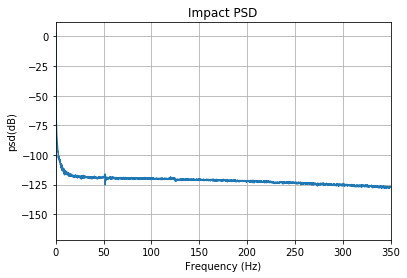

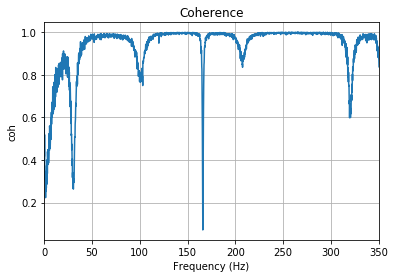

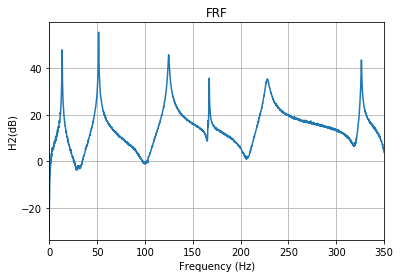

In [21]:
%matplotlib inline
mat_contents=sio.loadmat('modaldata/rawdata_1.mat')
Time_data= mat_contents['Time_domain']
Time_data= np.array(Time_data)
Time_data= np.transpose(Time_data)
rawimpact1 = mat_contents['Time_chan_1']
rawimpact1 = np.array(rawimpact1)
rawresponse1= mat_contents['Time_chan_2']
rawresponse1 = np.array(rawresponse1)
mat_contents=sio.loadmat('modaldata/rawdata_2.mat')
rawimpact2 = mat_contents['Time_chan_1']
rawimpact2 = np.array(rawimpact2)
rawresponse2= mat_contents['Time_chan_2']
rawresponse2 = np.array(rawresponse2)
mat_contents=sio.loadmat('modaldata/rawdata_3.mat')
rawimpact3 = mat_contents['Time_chan_1']
rawimpact3 = np.array(rawimpact3)
rawresponse3= mat_contents['Time_chan_2']
rawresponse3 = np.array(rawresponse3)
x= np.column_stack((rawresponse1,rawresponse2,rawresponse3))
x=np.array([x]).reshape(1,16384,3)
f= np.column_stack((rawimpact1,rawimpact2,rawimpact3))
f=np.array([f]).reshape(1,16384,3)
[freq,Pxx]=vt.crsd(x,x,Time_data,windowname="none")
[freq,Pff]=vt.crsd(f,f,Time_data,windowname="none")
[freq,Pxf]=vt.crsd(f,x,Time_data,windowname="none")
freq=np.array([freq]).reshape(1,8193)
H1=np.conj(Pxf/Pff)
H2=Pxx/Pxf
coh=(Pxf*np.conj(Pxf)).real/Pxx/Pff

fig=plt.figure()
plt.title('Impact PSD')
plt.plot(freq.T, 20*np.log10(abs(Pff)).T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('psd(dB)')
plt.grid()
plt.xlim(xmax=350, xmin=0)

fig=plt.figure()
plt.title('Coherence')
plt.plot(freq.T, coh.T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('coh')
plt.grid()
plt.xlim(xmax=350, xmin=0)

fig=plt.figure()
plt.title('FRF')
plt.plot(freq.T, 20*np.log10(abs(H2)).T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('H2(dB)')
plt.grid()
plt.xlim(xmax=350, xmin=0)

### Linearity Checks:

A structure FRF is independent of the excitation if it is linear. So the Linearity check is done when exciting the structure at various levels obtaining the same values for the FRF.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4c8b970908>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4c8b82a7f0>)

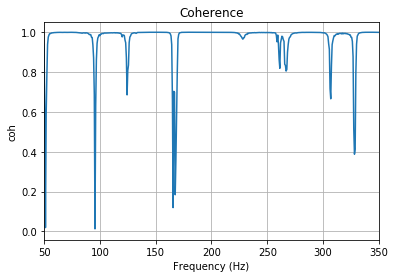

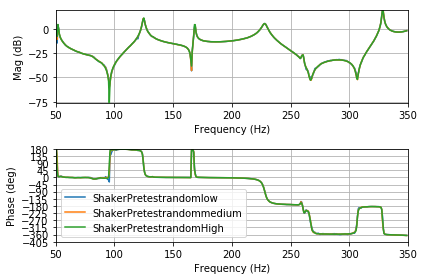

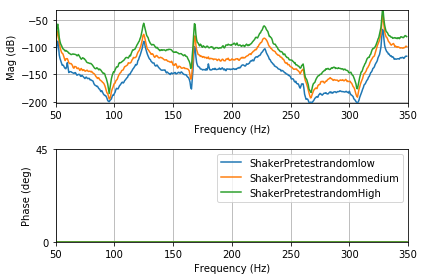

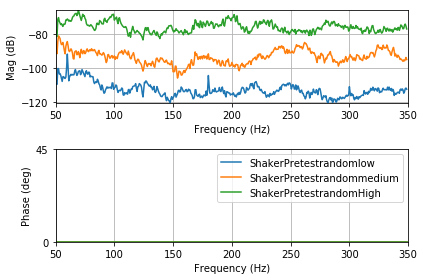

In [70]:
%matplotlib inline
mat_contents=sio.loadmat('linearitycheck/high.mat')
Frequency= mat_contents['Freq_domain']
Frequency= np.array(Frequency)
#Frequency= np.transpose(Frequency)
Highresponse = mat_contents['Hf_chan_2']
Highresponse = np.array(Highresponse)
PSDHighresponse = mat_contents['PSD_chan_2']
PSDHighresponse = np.array(PSDHighresponse)
PSDHighLevelRandom = mat_contents['PSD_chan_1']
PSDHighLevelRandom = np.array(PSDHighLevelRandom)
coh = mat_contents['Hf_coh_chan_2']
coh = np.array(coh)

mat_contents=sio.loadmat('linearitycheck/med.mat')

mediumresponse = mat_contents['Hf_chan_2']
mediumresponse = np.array(mediumresponse)
PSDmediumresponse = mat_contents['PSD_chan_2']
PSDmediumresponse = np.array(PSDmediumresponse)
PSDmediumLevelRandom = mat_contents['PSD_chan_1']
PSDmediumLevelRandom = np.array(PSDmediumLevelRandom)
mat_contents=sio.loadmat('linearitycheck/low.mat')

lowresponse = mat_contents['Hf_chan_2']
lowresponse = np.array(lowresponse)
PSDlowresponse = mat_contents['PSD_chan_2']
PSDlowresponse = np.array(PSDlowresponse)
PSDlowLevelRandom = mat_contents['PSD_chan_1']
PSDlowLevelRandom = np.array(PSDlowLevelRandom)

FRFs= np.column_stack((lowresponse,mediumresponse,Highresponse))
VibAutospectrum= np.column_stack((PSDlowresponse,PSDmediumresponse,PSDHighresponse))
ForceAutospectrum= np.column_stack((PSDlowLevelRandom,PSDmediumLevelRandom,PSDHighLevelRandom))
FRFs=np.array(FRFs)
VibAutospectrum=np.array(VibAutospectrum)
ForceAutospectrum=np.array(ForceAutospectrum)
#fig=plt.figure()
#plt.title('Impact PSD')
#plt.plot(Frequency.T, 20*np.log10(abs(Highresponse)).T)
#plt.plot(Frequency.T, 20*np.log10(abs(medresponse)).T)
#plt.plot(Frequency.T, 20*np.log10(abs(lowresponse)).T)
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('psd(dB)')
#plt.grid()
#plt.xlim(xmax=350, xmin=0)
fig=plt.figure()
plt.title('Coherence')
plt.plot(Frequency, coh)
plt.xlabel('Frequency (Hz)')
plt.ylabel('coh')
plt.grid()
plt.xlim(xmax=350, xmin=50)
#Highresponse.shape

vt.frfplot(Frequency,FRFs,freq_min=50,freq_max=350,type=1,legend=['ShakerPretestrandomlow','ShakerPretestrandommedium','ShakerPretestrandomHigh'])

vt.frfplot(Frequency,VibAutospectrum,freq_min=50,freq_max=350,type=1,legend=['ShakerPretestrandomlow','ShakerPretestrandommedium','ShakerPretestrandomHigh'])

vt.frfplot(Frequency,ForceAutospectrum,freq_min=50,freq_max=350,type=1,legend=['ShakerPretestrandomlow','ShakerPretestrandommedium','ShakerPretestrandomHigh'])

#vt.frfplot(abs(PSDHighLevelRandom),abs(PSDHighresponse),freq_min=0,freq_max=350,type=1,legend=['Linearisation'])

#plt.plot((abs(PSDHighLevelRandom),(abs(PSDHighresponse))


In [36]:
Frequency.shape

(3201, 1)

In [14]:
%matplotlib inline
mat_contents=sio.loadmat('linearitycheck/high.mat')
Frequency= mat_contents['Freq_domain']
Frequency= np.array(Frequency)
Frequency= np.transpose(Frequency)
Highresponse = mat_contents['Hf_chan_2']
Highresponse = np.array(Highresponse)
rawresponse1= mat_contents['Time_chan_2']
rawresponse1 = np.array(rawresponse1)
mat_contents=sio.loadmat('modaldata/rawdata_2.mat')
rawimpact2 = mat_contents['Time_chan_1']
rawimpact2 = np.array(rawimpact2)
rawresponse2= mat_contents['Time_chan_2']
rawresponse2 = np.array(rawresponse2)
mat_contents=sio.loadmat('modaldata/rawdata_3.mat')
rawimpact3 = mat_contents['Time_chan_1']
rawimpact3 = np.array(rawimpact3)
rawresponse3= mat_contents['Time_chan_2']
rawresponse3 = np.array(rawresponse3)
x= np.column_stack((rawresponse1,rawresponse2,rawresponse3))
x=np.array([x]).reshape(1,16384,3)
f= np.column_stack((rawimpact1,rawimpact2,rawimpact3))
f=np.array([f]).reshape(1,16384,3)
[freq,Pxx]=vt.crsd(x,x,Time_data,windowname="none")
[freq,Pff]=vt.crsd(f,f,Time_data,windowname="none")
[freq,Pxf]=vt.crsd(f,x,Time_data,windowname="none")
freq=np.array([freq]).reshape(1,8193)
H1=np.conj(Pxf/Pff)
H2=Pxx/Pxf
coh=(Pxf*np.conj(Pxf)).real/Pxx/Pff

fig=plt.figure()
plt.title('Impact PSD')
plt.plot(freq.T, 20*np.log10(abs(Pff)).T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('psd(dB)')
plt.grid()
plt.xlim(xmax=350, xmin=0)
plt.hold(True)
fig=plt.figure()
plt.title('Coherence')
plt.plot(freq.T, coh.T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('coh')
plt.grid()
plt.xlim(xmax=350, xmin=0)
plt.hold(True)
fig=plt.figure()
plt.title('FRF')
plt.plot(freq.T, 20*np.log10(abs(H2)).T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('H2(dB)')
plt.grid()
plt.xlim(xmax=350, xmin=0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

### Post-Test Analysis 

FRF data was collected at 18 points on the wing using NIMAX and Bobcat DAQs. An open source experimental modal analysis software called "OpenModal" was used only to animate the mode shapes but original characteristics of each mode were extracted by using Multiple degree of freedom curve fitting code in VibrationTesting module. 

#### Measurement of FRF Matrix: SISO (One row)
* One Roving Excitation
* One Fixed Response (reference)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f49ac1574a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f49ac21c588>)

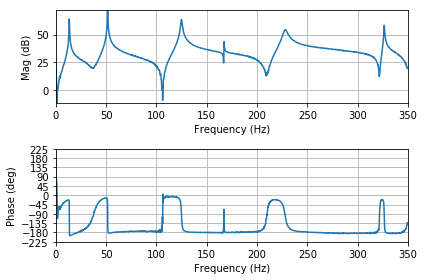

In [75]:
mat_contents=sio.loadmat('modaldata/frf1.mat')
h1 = mat_contents['frf1']
h1 = np.array(h1)
mat_contents=sio.loadmat('modaldata/frf2.mat')
h2 = mat_contents['frf2']
h2 = np.array(h2)
mat_contents=sio.loadmat('modaldata/frf3.mat')
h3 = mat_contents['frf3']
h3 = np.array(h3)
mat_contents=sio.loadmat('modaldata/frf4.mat')
h4 = mat_contents['frf4']
h4 = np.array(h4)
mat_contents=sio.loadmat('modaldata/frf5.mat')
h5 = mat_contents['frf5']
h5 = np.array(h5)
mat_contents=sio.loadmat('modaldata/frf6.mat')
h6 = mat_contents['frf6']
h6 = np.array(h6)
mat_contents=sio.loadmat('modaldata/frf7.mat')
h7 = mat_contents['frf7']
h7 = np.array(h7)
mat_contents=sio.loadmat('modaldata/frf8.mat')
h8 = mat_contents['frf8']
h8 = np.array(h8)
mat_contents=sio.loadmat('modaldata/frf9.mat')
h9 = mat_contents['frf9']
h9 = np.array(h9)
mat_contents=sio.loadmat('modaldata/frf10.mat')
h10 = mat_contents['frf10']
h10 = np.array(h10)
mat_contents=sio.loadmat('modaldata/frf11.mat')
h11 = mat_contents['frf11']
h11 = np.array(h11)
mat_contents=sio.loadmat('modaldata/frf12.mat')
h12 = mat_contents['frf12']
h12 = np.array(h12)
mat_contents=sio.loadmat('modaldata/frf13.mat')
h13 = mat_contents['frf13']
h13 = np.array(h13)
mat_contents=sio.loadmat('modaldata/frf14.mat')
h14 = mat_contents['frf14']
h14 = np.array(h14)
mat_contents=sio.loadmat('modaldata/frf15.mat')
h15 = mat_contents['frf15']
h15 = np.array(h15)
mat_contents=sio.loadmat('modaldata/frf16.mat')
h16 = mat_contents['frf16']
h16 = np.array(h16)
mat_contents=sio.loadmat('modaldata/frf17.mat')
h17 = mat_contents['frf17']
h17 = np.array(h17)
mat_contents=sio.loadmat('modaldata/frf18.mat')
h18 = mat_contents['frf18']
h18 = np.array(h18)
mat_contents=sio.loadmat('modaldata/freqencies.mat')
f = mat_contents['freqencies']
f = np.array(f)
TF= np.column_stack((h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18))
[Damping1,naturalfreq1,modeshape1]=vt.mdof_cf(f,TF,40,70)
[Damping2,naturalfreq2,modeshape2]=vt.mdof_cf(f,TF,165,255)
[Damping3,naturalfreq3,modeshape3]=vt.mdof_cf(f,TF,470,560)
[Damping4,naturalfreq4,modeshape4]=vt.mdof_cf(f,TF,640,730)
[Damping5,naturalfreq5,modeshape5]=vt.mdof_cf(f,TF,890,980)
[Damping6,naturalfreq6,modeshape6]=vt.mdof_cf(f,TF,1290,1390)
vt.frfplot(f,h2,freq_min=0,freq_max=350)


![alt](img/modeshape1.png) | ![alt](img/modeshape2.png) | ![alt](img/modeshape3.png) | ![alt](img/modeshape4.png) | ![alt](img/modeshape5.png) | ![alt](img/modeshape6.png)

## MAC:

The Modal Assurance Criterion (MAC) analysis is used to determine the similarity of two mode shapes:

* If the mode shapes are identical (i.e., all points move the same) the MAC will have a value of one or 100%. 
* If the mode shapes are very different, the MAC value will be close to zero.
 
*Note: A MAC analysis is only looking at the mode shape, it does not compare the frequency value.* 
 
### MAC Equation:
 
The MAC value between two modes is essentially the normalized dot product of the complex modal vector at each common nodes (i.e., points), as shown in Equation.  It can also be thought of as the square of correlation between two modal vectors φr and φs. Equation below is the Modal Assurance Criterion equation for comparing two mode shapes:



![alt](img/image.png)


If a linear relationship exists (i.e., the vectors move the same way) between the two complex vectors, the MAC value will be near to one. If they are linearly independent, the MAC value will be small (near zero).
 
A complex vector simply includes both amplitude and phase, whereas a real vector is real part only. In Equation, it is also clear that the MAC is not sensitive to scaling, so if all mode shape components are multiplied with the same factor, the MAC will not be affected.

If an experimental modal analysis had 18 different nodes where measurements were made, the mode shape components at all 18 nodes are taken into account to calculate the MAC value, but more importance will be attributed to the higher amplitude node locations.
             
### Uses:
 
A Modal Assurance Criterion (or MAC) analysis can be used in several different ways:
 
* Test-Test comparison – A MAC analysis can flag potential issues with the modal analysis results. Usually MAC will identify modes and areas that could benefit from acquiring more data points on the structure.
* FEA-FEA comparison – Several assumptions can be made in the creation of a FEA analysis: Young’s Modulus, boundary conditions, and mass density values to name a few. A MAC analysis can determine the degree to which these assumptions affect the resulting mode shapes.
* FEA-Test comparison – A MAC can be used to compare modes from an experimental modal analysis test to a Finite Element Analysis (FEA). It will indicate if the same mode shapes are found in both the test and FEA analysis.

### Resulting Eigen Vectors from Testing:

Here, considered the case of an experimental modal analysis performed on a wing, suspended free on one end and clamped on the other. Frequency Response Function (FRF) data was acquired at 18 locations on the wing. The FRF data was analyzed and a mode set extracted. 

In [76]:
mat_contents=sio.loadmat('Modeshapedata/1stNaturalFreq15.mat')
U1 = mat_contents['U1']
mat_contents=sio.loadmat('Modeshapedata/2ndNaturalFreq15.mat')
U2 = mat_contents['U2']
mat_contents=sio.loadmat('Modeshapedata/3rdNaturalFreq15.mat')
U3 = mat_contents['U3']
mat_contents=sio.loadmat('Modeshapedata/4rthNaturalFreq15.mat')
U4 = mat_contents['U4']
mat_contents=sio.loadmat('Modeshapedata/5thNaturalFreq15.mat')
U5 = mat_contents['U5']
mat_contents=sio.loadmat('Modeshapedata/6thNaturalFreq15.mat')
U6 = mat_contents['U6']
Psi_1 = np.array(U1)
Psi_2 = np.array(U2)
Psi_3 = np.array(U3)
Psi_4 = np.array(U4)
Psi_5 = np.array(U5)
Psi_6 = np.array(U6)
Psi_1=np.column_stack((Psi_1,Psi_2,Psi_3,Psi_4,Psi_5,Psi_6))
Psi_abs = np.abs(Psi_1)*np.real(np.sign(Psi_1))
Psi_1 = Psi_abs

### Test-Test Comparison:

The important thing to remember while we do modal analysis is that, when we have some sort of a structure, then we need to know how many points along the structure to test. For instance, initially, the wing structure was tested taking a guess of number of points as nine to capture all of our mode shapes accurately, however, it was noticed that the modes seen essentially looks like rigid body motion at higher frequencies.

It is quite similar to aliasing, when we think about reading in frequencies where we did not sample high enough, but here its about not considering enough points on the structure. So, one way to check that enough points were used to accurately capture all versus different mode shapes by using something called the MAC matrix.

In [77]:
vt.mac(Psi_1,Psi_1)

array([[ 1.         ,  0.012878134,  0.024564134,  0.021402321,  0.04530025 ,  0.00297411 ],
       [ 0.012878134,  1.         ,  0.05357427 ,  0.003010583,  0.008900821,  0.01555768 ],
       [ 0.024564134,  0.05357427 ,  1.         ,  0.002131827,  0.162034548,  0.00183518 ],
       [ 0.021402321,  0.003010583,  0.002131827,  1.         ,  0.000965057,  0.020653144],
       [ 0.04530025 ,  0.008900821,  0.162034548,  0.000965057,  1.         ,  0.000017919],
       [ 0.00297411 ,  0.01555768 ,  0.00183518 ,  0.020653144,  0.000017919,  1.         ]])

Acquiring an additional 9 points leads to better results.  With 18 total points, the mode shapes look completely different. So, with less response points, the spatial aliasing error was created.

*Note: The term used of "not enough response points" is called "Spacial Aliasing".*

In the above case, this is a mode set compared to itself.  The mode set contains six different individual modes, so 36 different MAC values are being calculated. About half the values are redundant –e.g., the MAC value between mode 1 and 3 is the same as between mode 3 and 1.

The first mode shape at 13 Hz is identical to itself, hence a value of 1. Along the diagonal, every mode is identical to itself, 1 to 1 (13 Hz), 2 to 2 (51 Hz), 3 to 3 (121 Hz), etc.

Off of the diagonal, the MAC values are very low.  Ideally, each mode should be uniquely observed and have a different shape than the other modes.  This is the case for this mode set.  The highest off diagonal mode pair is mode 5 compared to mode 3 (and vice versa 3 to 5) with a MAC value of 16%. All the other off-diagonal mode pairs are below 16%. 

In experimental modal analysis, the data measured in the 9 point modal analysis is not "wrong". The FRF measurements at these nodes were no different in the 9 point modal versus the 18 point, since the physical structure being tested did not change.  There was simply not enough measurement points to determine the complete mode shape.  This is different than a Finite Element modal analysis were the number of nodes does determine the dynamic behavior.

### Extension of modes from Modal Analysis to All DOF of a Finite Element Model after applying Guyan reduction:

Only guyan reduction was applied on the full M and K from the created model using WFEM module(Matlab) to reduce the M and K matrix. SEREP could be applied to reduce the M and K matrices further, however, in this case it would not give accurate results as only 6 mode shapes are retained which would result in a very small 6x6 sized M and K matrices.

In [78]:
mat_contents=sio.loadmat('FEmodaldata/WingBeamforMAC.mat')
K = (mat_contents['Kr'])
M = (mat_contents['Mr'])
Kbm = K.todense()
Mbm = M.todense()
omega, zeta, PsiBM = vt.sos_modal(Mbm, Kbm)
measured = np.array([[1,6,11,16,21,26,31,36,41,46,51,56,61,66,71]])
omega=np.array([omega[0], omega[1], omega[3], omega[4], omega[5], omega[6]])
Psi_fullBM=vt.mode_expansion_from_model(Psi_1, omega, Mbm, Kbm, measured)

In [79]:
mat_contents=sio.loadmat('FEmodaldata/WingBrickmuchMorMeshedforMAC1.mat')
K = (mat_contents['Kr'])
M = (mat_contents['Mr'])
Kbr = K.todense()
Mbr = M.todense()
omega, zeta, PsiBR = vt.sos_modal(Mbr, Kbr)
measured = np.array([[350, 347, 344, 278, 275, 272, 206, 203, 200, 134, 131, 128, 62, 59, 56]])
omega=np.array([omega[0], omega[1], omega[3], omega[4], omega[5], omega[6]])
Psi_fullBR=vt.mode_expansion_from_model(Psi_1, omega, Mbr, Kbr, measured)

So, the alternative to reducing the matrices from the finite element model is to expand the measured mode shape vectors to estimate the data at unmeasured locations. Expanding the measured data invariably involves using the finite element model to fill in the missing data. The vibration testing module in python has the function mode_expansion_from_model which does the expansion process for us.

### Resulting eigen vectors from FE model:

In [80]:
Psi_1 = PsiBM
mode1=Psi_1[:,0]
mode2=Psi_1[:,1]
mode3=Psi_1[:,3]
mode4=Psi_1[:,4]
mode5=Psi_1[:,5]
mode6=Psi_1[:,6]
Psi_2BM= np.column_stack((mode1, mode2, mode3, mode4, mode5, mode6))

In [81]:
Psi_1 = PsiBR
mode1=Psi_1[:,0]
mode2=Psi_1[:,1]
mode3=Psi_1[:,3]
mode4=Psi_1[:,4]
mode5=Psi_1[:,5]
mode6=Psi_1[:,6]
Psi_2BR= np.column_stack((mode1, mode2, mode3, mode4, mode5, mode6))

### FE-FE comparison: 

The below off-diagonal MAC values tell how bad the assumptions made were. We can observe that off-diagonal terms for the Brick model look better because of more mesh. 

In [82]:
vt.mac(Psi_2BM,Psi_2BM)

array([[ 1.         ,  0.28416901 ,  0.172196744,  0.         ,  0.132407293,  0.         ],
       [ 0.28416901 ,  1.         ,  0.371274112,  0.         ,  0.235979076,  0.         ],
       [ 0.172196744,  0.371274112,  1.         ,  0.         ,  0.379744752,  0.         ],
       [ 0.         ,  0.         ,  0.         ,  1.         ,  0.         ,  0.240949039],
       [ 0.132407293,  0.235979076,  0.379744752,  0.         ,  1.         ,  0.         ],
       [ 0.         ,  0.         ,  0.         ,  0.240949039,  0.         ,  1.         ]])

In [83]:
vt.mac(Psi_2BR,Psi_2BR)

array([[ 1.         ,  0.122984639,  0.041348987,  0.         ,  0.026004283,  0.         ],
       [ 0.122984639,  1.         ,  0.157153609,  0.         ,  0.060581719,  0.         ],
       [ 0.041348987,  0.157153609,  1.         ,  0.         ,  0.168759104,  0.         ],
       [ 0.         ,  0.         ,  0.         ,  1.         ,  0.         ,  0.10115887 ],
       [ 0.026004283,  0.060581719,  0.168759104,  0.         ,  1.         ,  0.         ],
       [ 0.         ,  0.         ,  0.         ,  0.10115887 ,  0.         ,  1.         ]])

###  FE-Test Comparison:

After collecting Frequency Response Functions (FRFs) on the wing, a MAC analysis was done between the first six experimental test modes and the first six finite element analysis modes.  The results are shown below.

In [84]:
vt.mac(Psi_fullBM,Psi_2BM)

array([[ 0.902776121,  0.08397938 ,  0.133234332,  0.000280447,  0.069636931,  0.000567165],
       [ 0.157055975,  0.892874372,  0.1246398  ,  0.000251338,  0.095492976,  0.000255381],
       [ 0.029469884,  0.217923327,  0.896786436,  0.000113918,  0.154537904,  0.000015324],
       [ 0.009130519,  0.00258551 ,  0.001044216,  0.10351289 ,  0.00068626 ,  0.087508   ],
       [ 0.071166016,  0.067331544,  0.34484064 ,  0.000039387,  0.854315037,  0.000332692],
       [ 0.007015925,  0.009076935,  0.000333458,  0.899795777,  0.001109486,  0.124936721]])

In [85]:
vt.mac(Psi_fullBR,Psi_2BR)

array([[ 0.419687707,  0.000826393,  0.002039278,  0.000059746,  0.004514538,  0.000070361],
       [ 0.010436219,  0.383714861,  0.000050142,  0.000000193,  0.001243138,  0.000022064],
       [ 0.038379026,  0.000165336,  0.299634258,  0.000027009,  0.000093382,  0.000075664],
       [ 0.017322709,  0.001122434,  0.000278439,  0.492081088,  0.000266308,  0.014127599],
       [ 0.013926318,  0.069706433,  0.002956606,  0.000573113,  0.236123559,  0.000164655],
       [ 0.004917083,  0.007407191,  0.003720332,  0.005166634,  0.000011543,  0.428847769]])

Looking at the diagonal and off-diagonal of the MAC matrix:

Beam model observations: 

* Diagonal MAC values are not 100%, because the two sets of modes are not identical.
* Modes 4 and 6 are less than 25%, the reason being torsional modes.
* The highest off diagonal mode pair is mode 5 compared to mode 3 (and vice versa 3 to 5) with a MAC value of 34%. All the other off-diagonal mode pairs are below 16%.

Brick model:

* Diagonal MAC values are not even 50%, may be because the mode shape locations did not match well.
* Similar to the Beam model, torsional modes have very less diagonal MAC values. 
* The highest off diagonal mode pair is mode 1 compared to mode 3 (and vice versa 3 to 1) with a MAC value of 3%. All the other off-diagonal mode pairs are below 3%.

In this case, the MAC analysis indicates that there is room for improvement in the correlation of the test and FEA. This 
can be done by correcting the M and K from FE model using 'Baruch' method

### FE Beam model Correction:

Baruch method of model correction is a Direct model updating Technique using modal data. This can be simply be performed using the model_correction_direct function in the vibration testing module in Python.


In [86]:
omega=np.array([13.54, 51.81, 125.19, 167.76, 228.05, 328.41])
Mc, Kc = vt.model_correction_direct(Psi_fullBM, omega, Mbm, Kbm, method='Baruch')
omega, zeta, PsiBM = vt.sos_modal(Mc, Kc)
Psi_2 = PsiBM
mode1=Psi_2[:,0]
mode2=Psi_2[:,1]
mode3=Psi_2[:,2]
mode4=Psi_2[:,3]
mode5=Psi_2[:,4]
mode6=Psi_2[:,5]
Psi_2BM= np.column_stack((mode1, mode2, mode3, mode4, mode5, mode6))

In [87]:
omega=np.array([13.54, 51.81, 125.19, 167.76, 228.05, 328.41])
Mc, Kc = vt.model_correction_direct(Psi_fullBR, omega, Mbr, Kbr, method='Baruch')
omega, zeta, PsiBR = vt.sos_modal(Mc, Kc)
Psi_2 = PsiBR
mode1=Psi_2[:,0]
mode2=Psi_2[:,1]
mode3=Psi_2[:,2]
mode4=Psi_2[:,3]
mode5=Psi_2[:,4]
mode6=Psi_2[:,5]
Psi_2BR= np.column_stack((mode1, mode2, mode3, mode4, mode5, mode6))

In [88]:
vt.mac(Psi_fullBM,Psi_2BM)

array([[ 0.881321121,  0.038974652,  0.026369503,  0.022319756,  0.043063273,  0.004626752],
       [ 0.151688823,  0.966339971,  0.083540347,  0.000101145,  0.00984486 ,  0.012454445],
       [ 0.026114408,  0.130064798,  0.985585275,  0.000779997,  0.146162695,  0.000792393],
       [ 0.000705308,  0.000182381,  0.000003272,  0.958222761,  0.000485955,  0.055843798],
       [ 0.016009234,  0.033694923,  0.135101087,  0.00022769 ,  0.999311401,  0.000000001],
       [ 0.000009955,  0.001125275,  0.002966466,  0.116284286,  0.000000452,  0.990680361]])

In [89]:
vt.mac(Psi_fullBR,Psi_2BR)

array([[ 0.698262238,  0.000359566,  0.001196876,  0.033783873,  0.000001657,  0.002985744],
       [ 0.08548994 ,  0.798983181,  0.011013081,  0.000197895,  0.016457018,  0.014427994],
       [ 0.01609378 ,  0.065317434,  0.895059712,  0.001135323,  0.055996187,  0.003718399],
       [ 0.025364975,  0.003495387,  0.004594898,  0.96107467 ,  0.000053346,  0.018941836],
       [ 0.013595906,  0.008849519,  0.049541316,  0.000901858,  0.978078484,  0.001089207],
       [ 0.004008585,  0.002180803,  0.030543414,  0.052915722,  0.000170555,  0.987921688]])

So, after updating the model the MAC matrix results improved drastically. When comparing the three observations made before correcting the model to after correcting:

* MAC values are still not 100%, but very close enough .
* MAC values of the torsional modes were improved to great extent.
* The highest off diagonal mode pair is mode 5 compared to mode 3 (and vice versa 3 to 5) with a MAC value of 34% before is now 13.5%. All the other off-diagonal mode pairs are below 16%. Thats for the Beam model. However, for the Brick off-diagonal terms increased.


### Conclusion:

A Modal Assurance Criterion (or MAC) analysis can be used for FEA-Test, FEA-FEA and Test-Test comparisons of modes. By analyzing a MAC matrix, an engineer can improve the quality of an experimental modal test, verify finite element models, and update FEA models with test data.